<a href="https://colab.research.google.com/github/gomlfx/machineLearningForex/blob/master/ytcsbspp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install quandl

In [0]:
import pandas as pd
import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/gomlfx/machineLearningForex/master/EURUSD60.csv")
df.tail()

,1971.01.04,00:00,0.53690,0.53690.1,0.53690.2,0.53690.3,1
136465,2019.11.29,16:00,1.09923,1.10026,1.09899,1.10000,4084
136466,2019.11.29,17:00,1.10000,1.10281,1.09986,1.10274,6420
136467,2019.11.29,18:00,1.10274,1.10277,1.10144,1.10188,5662
136468,2019.11.29,19:00,1.10188,1.10226,1.10160,1.10161,3267
136469,2019.11.29,20:00,1.10160,1.10199,1.10160,1.10197,154


In [4]:
#get the data
column_headers = ['date', 'time', 'open', 'high', 'low', 'close', 'volume']
df = pd.read_csv("https://raw.githubusercontent.com/gomlfx/machineLearningForex/master/EURUSD60.csv", header=None, names= column_headers)

df.tail()

,date,time,open,high,low,close,volume
136466,2019.11.29,16:00,1.09923,1.10026,1.09899,1.10000,4084
136467,2019.11.29,17:00,1.10000,1.10281,1.09986,1.10274,6420
136468,2019.11.29,18:00,1.10274,1.10277,1.10144,1.10188,5662
136469,2019.11.29,19:00,1.10188,1.10226,1.10160,1.10161,3267
136470,2019.11.29,20:00,1.10160,1.10199,1.10160,1.10197,154


In [5]:
df = df[['close']]
df.tail()

,close
136466,1.10000
136467,1.10274
136468,1.10188
136469,1.10161
136470,1.10197


In [6]:
forecast_out = 30
#create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['close']].shift(-forecast_out)
print(df.tail())

          close  Prediction
136466  1.10000         NaN
136467  1.10274         NaN
136468  1.10188         NaN
136469  1.10161         NaN
136470  1.10197         NaN


In [7]:
#create independent x
x = np.array(df.drop(['Prediction'],1))
#remove last n rows
x = x[:-forecast_out]
print(x)


[[0.5369 ]
 [0.5366 ]
 [0.5365 ]
 ...
 [1.1011 ]
 [1.10021]
 [1.10034]]


In [8]:
#convert df to np array
y = np.array(df['Prediction'])
#get all y values except last n rows
y = y[:-forecast_out]
print(y)

[0.5387  0.5384  0.5385  ... 1.10188 1.10161 1.10197]


In [9]:
df.head()

,close,Prediction
0,0.5369,0.5387
1,0.5366,0.5384
2,0.5365,0.5385
3,0.5368,0.5388
4,0.5371,0.5387


In [0]:
#split data into 80/20 train/test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [0]:
#make/train model svm

In [0]:
# svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma=0.1)
# svr_rbf.fit(x_train, y_train)

In [0]:
# #test model 
# svm_confidence = svr_rbf.score(x_test, y_test)
# print("svm confidence:", svm_confidence)

In [0]:
#make/train linear regression

In [0]:
# lr = LinearRegression()
# #train model
# lr.fit(x_train, y_train)

In [0]:
# lr_confidence = lr.score(x_test, y_test)
# print("lr confidence:", lr_confidence)

In [0]:
#make/train lgbm
from lightgbm import LGBMRegressor 

In [18]:
lgbm = LGBMRegressor()
#train the model
lgbm.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [19]:
lgbm_confidence = lgbm.score(x_test, y_test)
print("lgbm confidence: ", lgbm_confidence)

lgbm confidence:  0.9949624190263977


In [20]:
#set x_forecast equal to the last 30 rows of the original data set from close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[1.10081]
 [1.10053]
 [1.10061]
 [1.10061]
 [1.10078]
 [1.10085]
 [1.10089]
 [1.10084]
 [1.1007 ]
 [1.10105]
 [1.10113]
 [1.10102]
 [1.10114]
 [1.101  ]
 [1.10104]
 [1.10102]
 [1.10101]
 [1.1009 ]
 [1.10111]
 [1.1005 ]
 [1.10044]
 [1.10047]
 [1.09961]
 [1.09962]
 [1.09924]
 [1.1    ]
 [1.10274]
 [1.10188]
 [1.10161]
 [1.10197]]


In [21]:
#print the predictions for the next n days
lgbm_prediction = lgbm.predict(x_forecast)
print(lgbm_prediction)

[1.10105493 1.10105493 1.10105493 1.10105493 1.10105493 1.10105493
 1.10105493 1.10105493 1.10105493 1.10105493 1.10105493 1.10105493
 1.10105493 1.10105493 1.10105493 1.10105493 1.10105493 1.10105493
 1.10105493 1.10105493 1.10105493 1.10105493 1.09955059 1.09955059
 1.09955059 1.10105493 1.10125803 1.10125803 1.10125803 1.10125803]


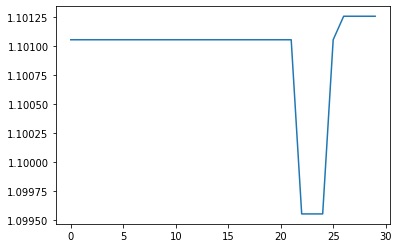

In [22]:
import matplotlib.pyplot as plt
plt.plot(lgbm_prediction)
plt.show()